In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')


## 릿지 회귀(Ridge Regression) L2규제

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
* α=0이면 릿지회귀는 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  * p:특성의갯수


In [3]:
boston = load_boston()

In [4]:
boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

In [8]:
model_ridge = make_pipeline(StandardScaler(), Ridge())
model_ridge.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [9]:
model_ridge.score(x_train, y_train)

0.7293360329044442

In [10]:
model_ridge.score(x_test, y_test)

0.7634038058032349

In [11]:
model_ridge5 = make_pipeline(StandardScaler(), Ridge(alpha=5.0))
model_ridge5.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=5.0))])

In [12]:
print(model_ridge5.score(x_train, y_train))
print(model_ridge5.score(x_test, y_test))

0.7289067264142004
0.7629020804027657


## 라쏘 회귀(Lasso Regression) L1규제
​
​
* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
​
* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
​
\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}
​
* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능
* p: 독립변수의 갯수


In [13]:
model_lasso = make_pipeline(StandardScaler(), Lasso())
model_lasso.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [14]:
print(model_lasso.score(x_train, y_train))
print(model_lasso.score(x_test, y_test))

0.6510370822546789
0.6546512972478653


In [15]:
model_lasso5 = make_pipeline(StandardScaler(), Lasso(alpha=5.0))
model_lasso5.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=5.0))])

In [16]:
print(model_lasso5.score(x_train, y_train))
print(model_lasso5.score(x_test, y_test))

0.2411098676402389
0.20844368630060406


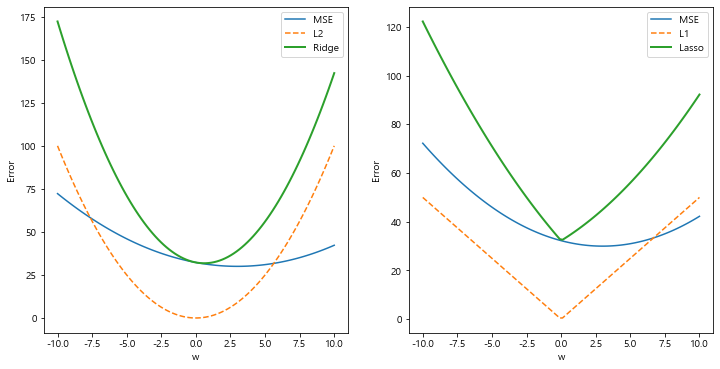

In [18]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,6])

rng = np.linspace(-10,10,100)
mse = ( 0.5*(rng-3) )**2 + 30
l2 = rng**2
l1 = 5*np.abs(rng)
ridge = mse + l2
lasso = mse + l1

plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()


In [17]:
# from sklearn.pipeline import Pipeline

In [27]:
modelLasso = Pipeline([('scl', StandardScaler()), ('clf', Lasso())])
# param_value = {'clf_alpha':[0.001,0.01, 1,2,3,4], 'scl_with_mean':[True,False]}
param_value = {'clf__alpha':[0.001,0.01, 1,2,3,4]}
gridSearch = GridSearchCV(modelLasso, param_grid=param_value, cv=10, verbose=1, scoring='r2')
gridSearch.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', Lasso())]),
             param_grid={'clf__alpha': [0.001, 0.01, 1, 2, 3, 4]}, scoring='r2',
             verbose=1)

In [28]:
gridSearch.best_score_

0.6779423483447163

In [29]:
gridSearch.best_params_

{'clf__alpha': 0.01}

In [30]:
gridSearch.cv_results_

{'mean_fit_time': array([0.0045234 , 0.00422683, 0.00406094, 0.00778165, 0.0045578 ,
        0.00337372]),
 'std_fit_time': array([0.00065098, 0.00037796, 0.00080461, 0.00473282, 0.00143176,
        0.00043584]),
 'mean_score_time': array([0.00195038, 0.00155563, 0.00151439, 0.00359869, 0.00190477,
        0.00151017]),
 'std_score_time': array([0.00057129, 0.00044409, 0.00050608, 0.00174523, 0.00065864,
        0.00048826]),
 'param_clf__alpha': masked_array(data=[0.001, 0.01, 1, 2, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__alpha': 0.001},
  {'clf__alpha': 0.01},
  {'clf__alpha': 1},
  {'clf__alpha': 2},
  {'clf__alpha': 3},
  {'clf__alpha': 4}],
 'split0_test_score': array([0.86741933, 0.8674495 , 0.74379226, 0.63721411, 0.49084771,
        0.3494708 ]),
 'split1_test_score': array([0.53857014, 0.53985541, 0.56511277, 0.53008636, 0.44409762,
        0.35941902]),
 'split2_test_score': a

In [32]:
gridSearch.best_estimator_.predict(x_test)

array([32.47490159, 28.12987635, 17.99758874, 21.59467646, 18.78113215,
       19.9054232 , 32.24548395, 18.10731193, 24.28355458, 27.07276872,
       26.91811443, 28.84699137, 21.25821228, 26.78436789, 23.35425277,
       20.55737907, 17.31818837, 38.20107276, 30.49008317,  8.86690023,
       20.8036567 , 16.38064481, 25.21265174, 24.89868344, 31.33266735,
       10.7419558 , 13.88204311, 16.89019083, 36.48926363, 14.60805028,
       21.33716851, 13.96614295, 42.93446218, 17.9737495 , 22.0898439 ,
       20.714934  , 17.59898767, 27.30050043,  9.37526708, 19.74832155,
       24.6039903 , 21.25145519, 29.49189492, 16.24904175, 19.22623771,
       14.6501572 , 39.1377036 , 18.06654423, 25.84809473, 20.44186795,
       25.11177946, 24.39847463, 25.12406209, 26.58879586,  4.82750881,
       24.00969384, 10.90593883, 26.89589097, 16.92873279, 35.8638718 ,
       19.53784819, 27.53852396, 16.52302842, 18.71106844, 11.21959849,
       32.33423855, 36.70207163, 22.33109429, 24.50027637, 25.06

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수


In [33]:
model_elastic = make_pipeline(StandardScaler(), ElasticNet())
model_elastic.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [35]:
print(model_elastic.score(x_train, y_train))
print(model_elastic.score(x_test, y_test))

0.635207359597604
0.6285547370483677


 alpha=1.0, l1_ratio=0.5  
 grid search를 이용해 최적의 alpha와 l1 ratio

In [45]:
modelelastic = Pipeline([('scl', StandardScaler()), ('clf',ElasticNet())])
param_value = {'clf__alpha': [0.001, 0.01, 1, 2, 3, 4],
              'clf__l1_ratio' : [0.1, 0.5, 1]}
gridSearch = GridSearchCV(modelelastic, param_grid = param_value, cv = 10, verbose = 1, scoring = 'r2')
gridSearch.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', ElasticNet())]),
             param_grid={'clf__alpha': [0.001, 0.01, 1, 2, 3, 4],
                         'clf__l1_ratio': [0.1, 0.5, 1]},
             scoring='r2', verbose=1)

In [46]:
gridSearch.best_score_

0.6779423483447163

In [47]:
gridSearch.best_params_

{'clf__alpha': 0.01, 'clf__l1_ratio': 1}

In [48]:
gridSearch.cv_results_

{'mean_fit_time': array([0.00368893, 0.00319138, 0.00309172, 0.00299201, 0.00318899,
        0.0032743 , 0.00298111, 0.00279362, 0.00280938, 0.00290031,
        0.0030055 , 0.00287018, 0.00290101, 0.00287721, 0.0027807 ,
        0.00288925, 0.00270126, 0.00299499]),
 'std_fit_time': array([7.74764086e-04, 3.99041215e-04, 2.99247178e-04, 2.43140197e-07,
        4.07561386e-04, 4.39414939e-04, 2.46608381e-05, 3.92275937e-04,
        4.17702386e-04, 2.90135580e-04, 4.30039537e-04, 2.99855782e-04,
        3.03488909e-04, 3.01160331e-04, 3.93226177e-04, 3.00352572e-04,
        4.53662587e-04, 2.11436957e-05]),
 'mean_score_time': array([0.00149388, 0.00109701, 0.00119677, 0.00129654, 0.00139754,
        0.00121241, 0.00102806, 0.00120604, 0.00120962, 0.00121026,
        0.00109866, 0.00119994, 0.00131099, 0.00150418, 0.00120833,
        0.00110066, 0.00130579, 0.00100963]),
 'std_score_time': array([4.95119711e-04, 2.99199431e-04, 3.98981666e-04, 4.57043372e-04,
        4.92476935e-04, 4.01

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

$ * 차수(차수 2는 2번곱함 x^2, 차수3은 3번곱합 x^3)가  
높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


In [49]:
model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [50]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9264046957163292
0.911624405563433
